In [1]:
import sys
import os
import json
from shapely.geometry import shape
import numpy as np
from dask.distributed import Client, LocalCluster
from pystac_client import Client as StacClient
import stackstac
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
cluster = LocalCluster(
    n_workers=4,             # safe for 15 GB RAM
    threads_per_worker=1,    # raster operations run best single-threaded
    memory_limit="6GB"       # 3 workers × 4GB = 12GB used
)

client = Client(cluster)
cluster

LocalCluster(00e3c018, 'tcp://127.0.0.1:44687', workers=4, threads=4, memory=22.35 GiB)

In [3]:
# Add the folder containing WQI_utils.py
sys.path.append(os.path.abspath("../utils"))

## 2 Import the main functions
from test_utils import wqi_indices

Searching STAC items...
 - Found 3 items
 - Stack created

Generating Quicklook (thumbnail)...


/opt/conda/envs/geog313-final-project/lib/python3.11/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


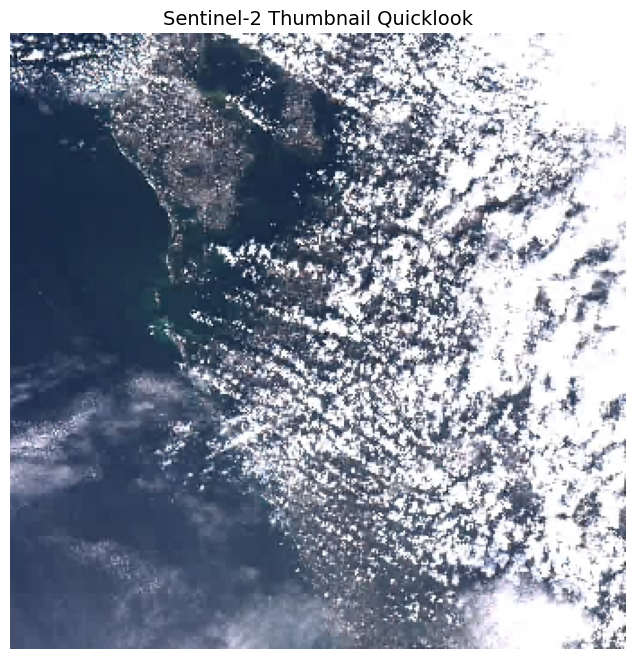

 - Calculating NDWI...
 - Plotting NDWI time series...


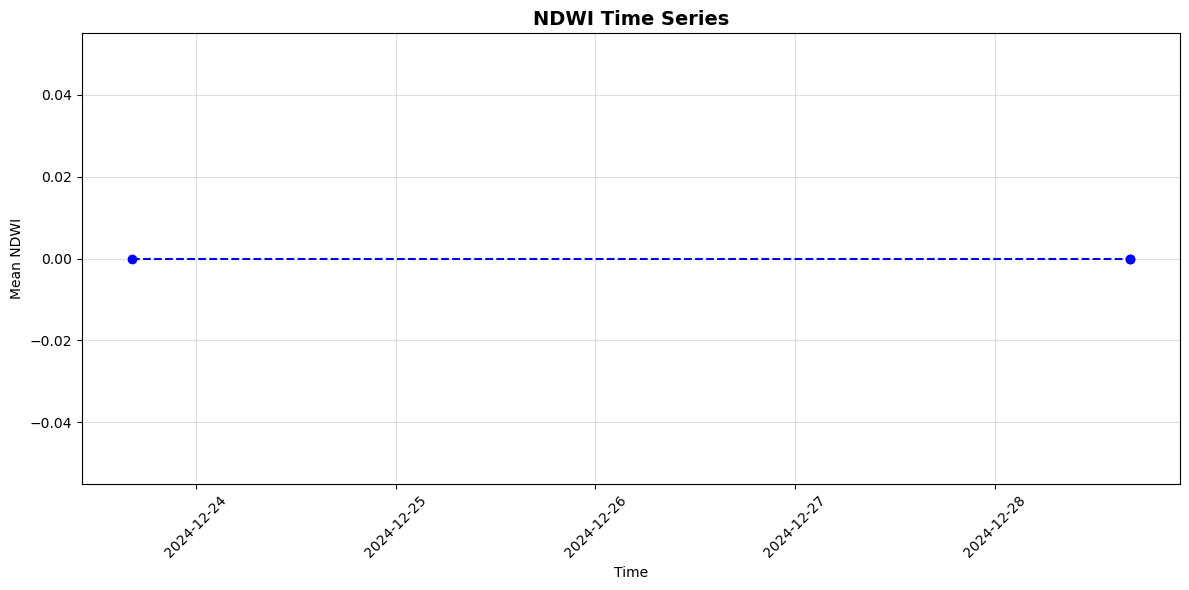

 - Calculating NDTI...
 - Plotting NDTI time series...


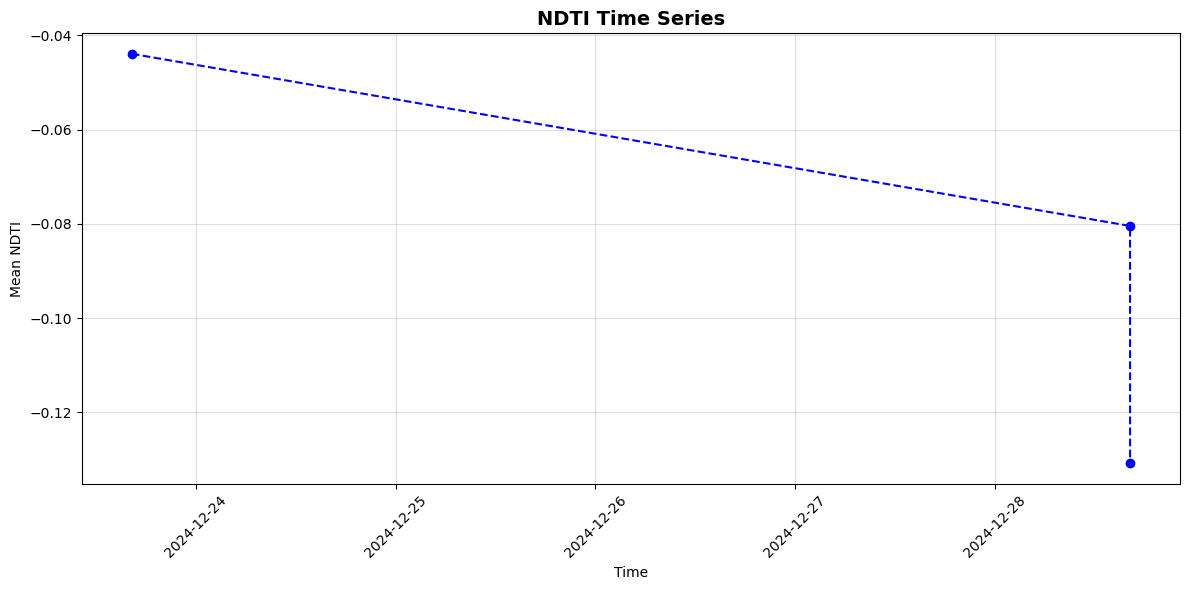

 - Calculating NDCI...


KeyError: "not all values found in index 'band'. Try setting the `method` keyword argument (example: method='nearest')."

In [4]:
bbox_test = (-82.7, 27.6, -82.3, 28.0)  # Example for Tampa Bay


results = wqi_indices(
    bbox=bbox_test,
    start_date="2019-01-01",
    end_date="2024-12-31",
    max_items=3,
    filter_clouds=True,
    downsample_factor=10
)


In [ ]:
# Access the mosaiced stack
stack_mosaic = results["stack"]

# Access mean time series
ndwi_ts = results["indices"]["NDWI"]["time_series"]
ndti_ts = results["indices"]["NDTI"]["time_series"]
ndci_ts = results["indices"]["NDCI"]["time_series"]

# Access spatial maps
#ndwi_map = results["indices"]["NDWI"]["spatial"]
#ndci_map = results["indices"]["NDCI"]["spatial"]
